In [2]:
import sys
sys.path.append("../lropy")

%load_ext autoreload
%autoreload complete

In [3]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator
import pandas as pd
import numpy as np
import seaborn as sb
import spiceypy as spice
import pickle
from scipy.spatial.transform import Rotation
import cartopy.crs as ccrs

from datetime import datetime, timedelta
from pathlib import Path

In [46]:
from lropy.analysis.spice_tools import as_et, as_utc, as_tdb, generate_lro_ephemeris
from lropy.analysis.io import load_simulation_results, pos_names, acc_names, irr_names, panels_count_names, load_pickled_simulation_results, _get_column_names, load_walltime_duration
from lropy.analysis.plotting import format_plot, save_plot
from lropy.analysis.transform import spher2cart, cart2spher, align_vectors
from lropy.analysis.util import get_hour_index, get_revolutions_index
from lropy.constants import JULIAN_DAY

In [39]:
# track, definitive rotation
run = load_simulation_results("../results/2023-08-11T14-43-05-1f32d", do_tf=True)

def create_mat(row):
    rot = Rotation.from_matrix(np.array([
        [row["rot_LRO_Moon_r11"], row["rot_LRO_Moon_r12"], row["rot_LRO_Moon_r13"]],
        [row["rot_LRO_Moon_r21"], row["rot_LRO_Moon_r22"], row["rot_LRO_Moon_r23"]],
        [row["rot_LRO_Moon_r31"], row["rot_LRO_Moon_r32"], row["rot_LRO_Moon_r33"]]
    ])).as_rotvec()
    return np.degrees(np.linalg.norm(rot))
run["rot"] = run.apply(create_mat, axis=1)


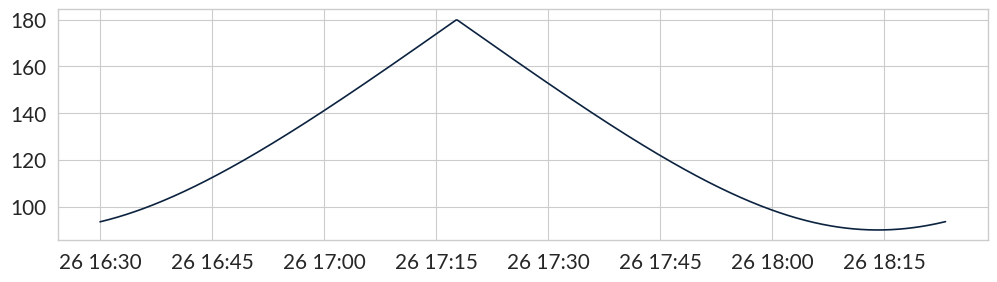

In [40]:
plt.plot(run["rot"])

Check if discontinuities are also present in actual rotational state
maybe use scipy Rotation to find angle

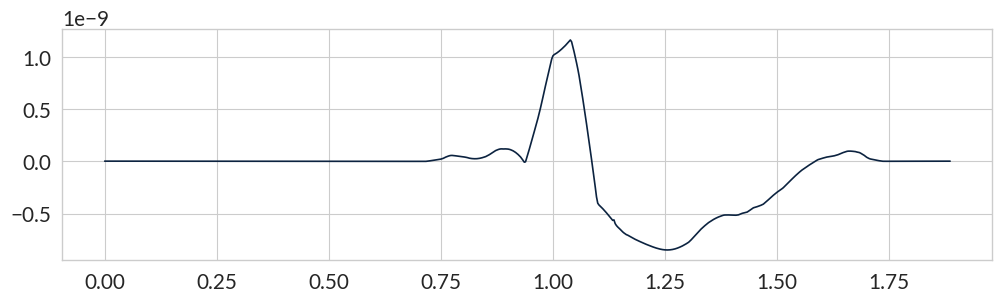

In [44]:
plt.plot(get_hour_index(run), run["acc_rp_moon_cross"])

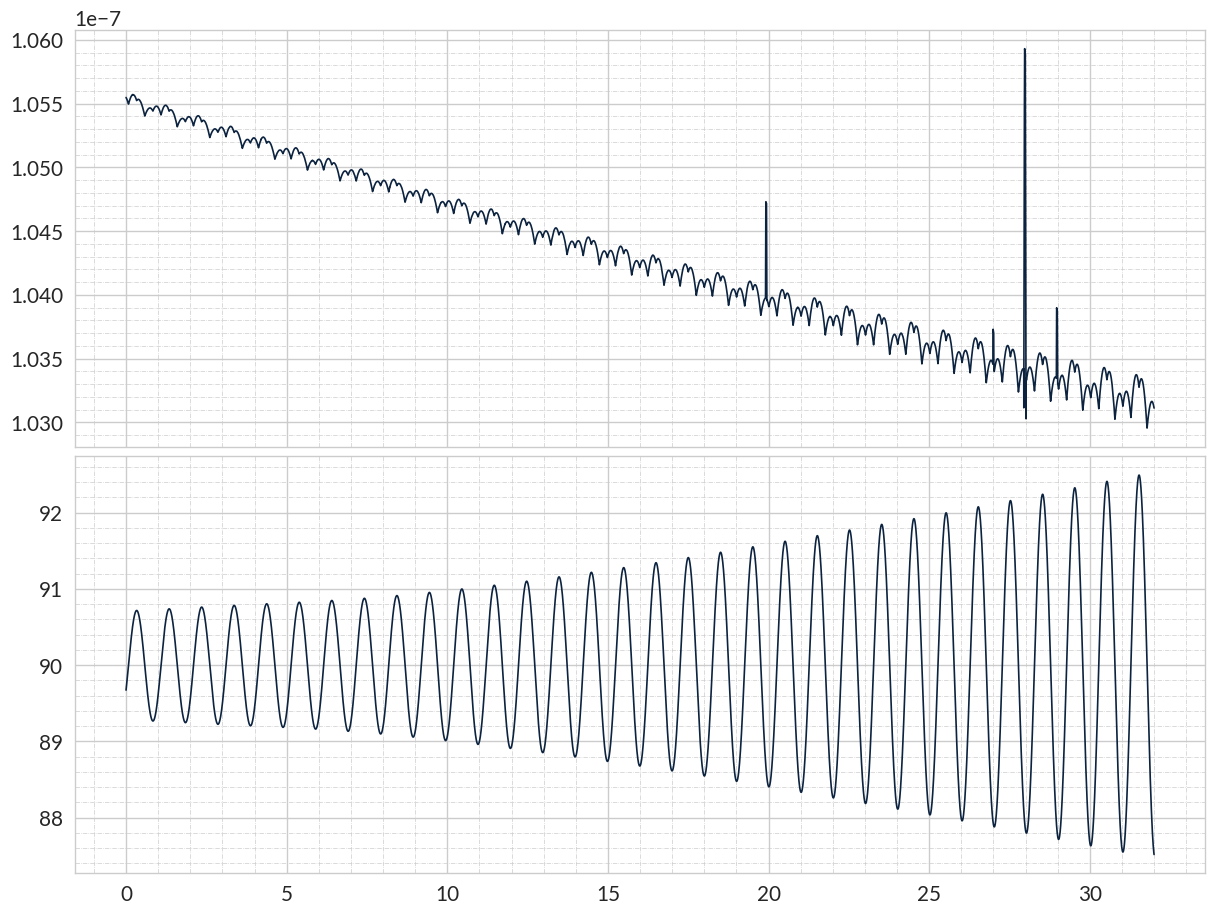

In [70]:
# Jun 30, 00:00
metadata, runs = load_pickled_simulation_results("../results/full-2023-08-13T11-33-13-e2839")
fig, axs = plt.subplots(2, figsize=(12, 9), sharex=True)
axs[0].plot(get_revolutions_index(runs[1]), runs[1]["acc_rp_sun_cross"])
axs[1].plot(get_revolutions_index(runs[1]), runs[1]["angle_subsolar"])
# plt.xlim([2, 6])
format_plot()

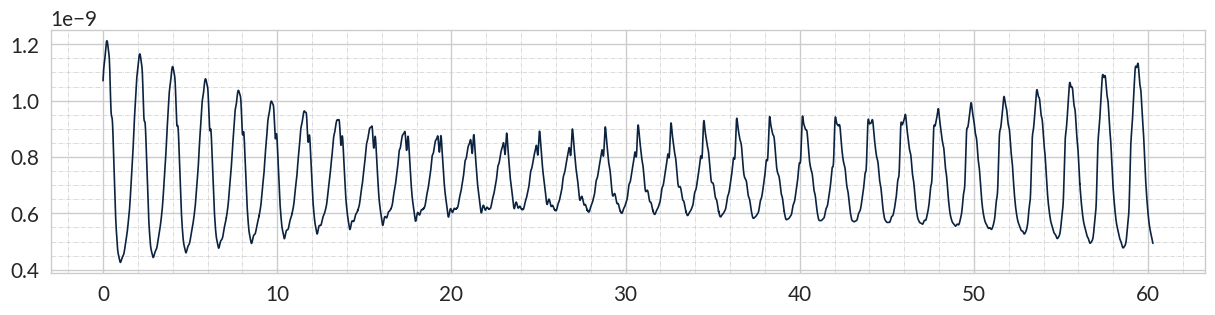

In [73]:
# Jun 28, 15:00
metadata, runs = load_pickled_simulation_results("../results/single-2023-08-13T11-46-21-3c6f5")
plt.plot(get_hour_index(runs[1]), runs[1]["acc_rp_moon_radial"])
format_plot()

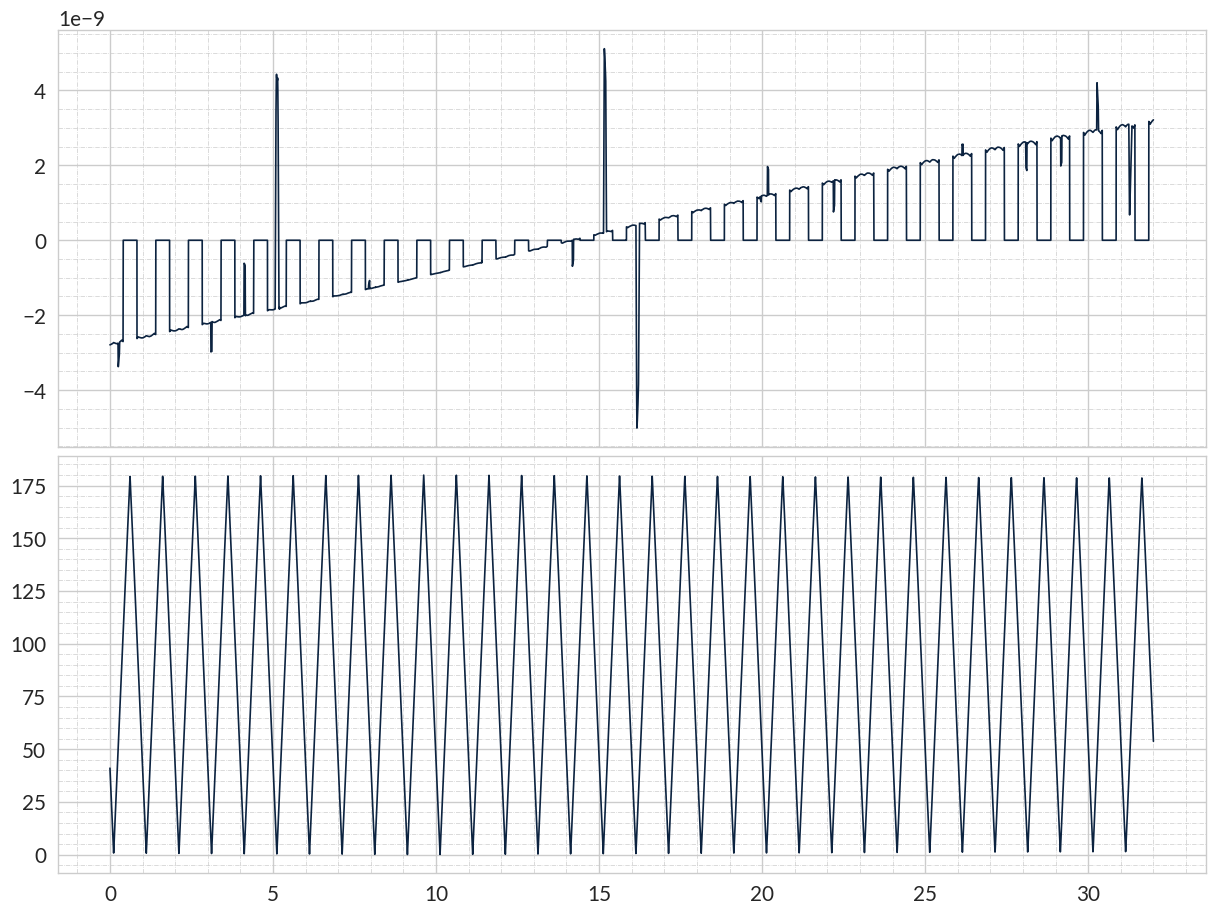

In [68]:
# 2010 MAR 28 06:00:00
metadata, runs = load_pickled_simulation_results("../results/single-2023-08-13T12-07-03-c6be2")
fig, axs = plt.subplots(2, figsize=(12, 9), sharex=True)
axs[0].plot(get_revolutions_index(runs[1]), runs[1]["acc_rp_sun_cross"])
axs[1].plot(get_revolutions_index(runs[1]), runs[1]["angle_subsolar"])
# plt.xlim([2, 6])
format_plot()

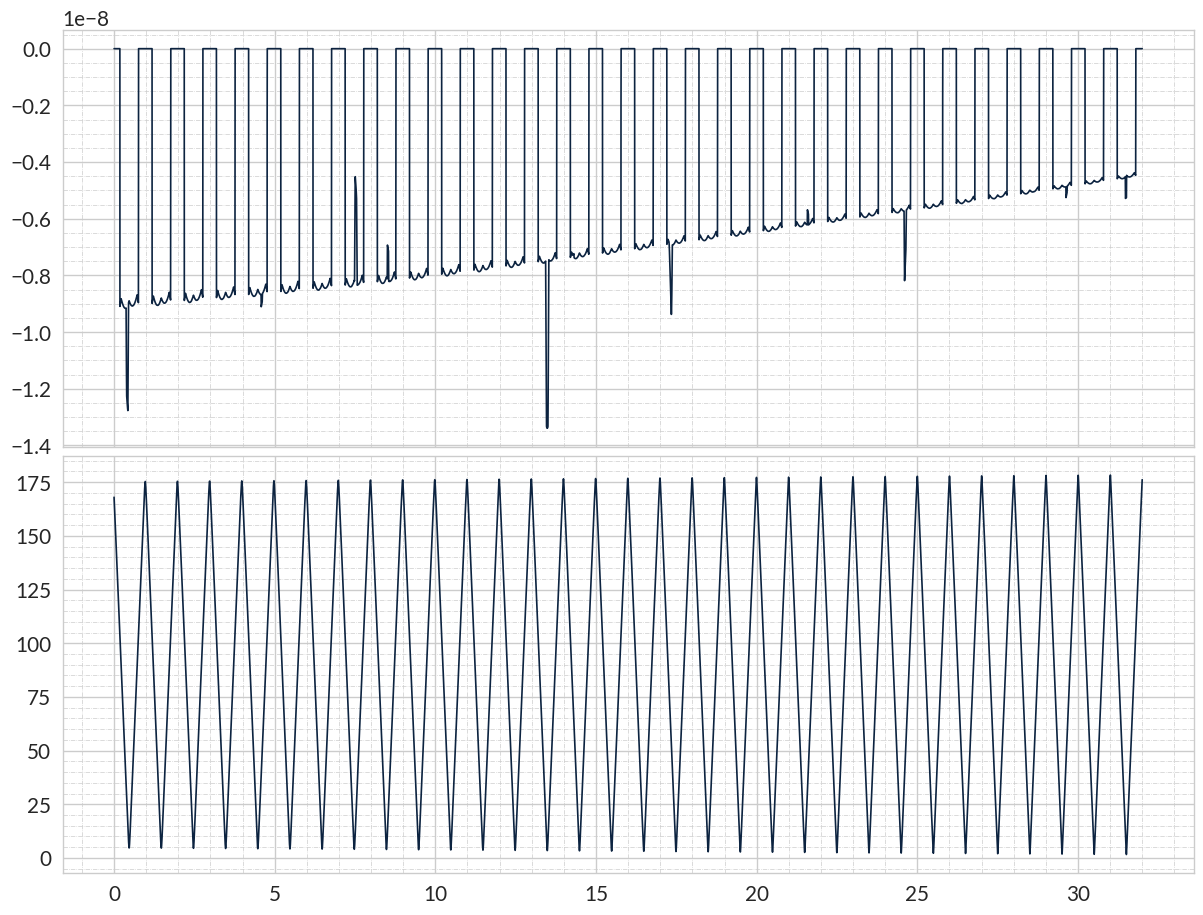

In [69]:
# 2010 MAR 25 00:00:00
metadata, runs = load_pickled_simulation_results("../results/single-2023-08-13T13-02-58-7d0ce")
fig, axs = plt.subplots(2, figsize=(12, 9), sharex=True)
axs[0].plot(get_revolutions_index(runs[1]), runs[1]["acc_rp_sun_cross"])
axs[1].plot(get_revolutions_index(runs[1]), runs[1]["angle_subsolar"])
# plt.xlim([2, 6])
format_plot()

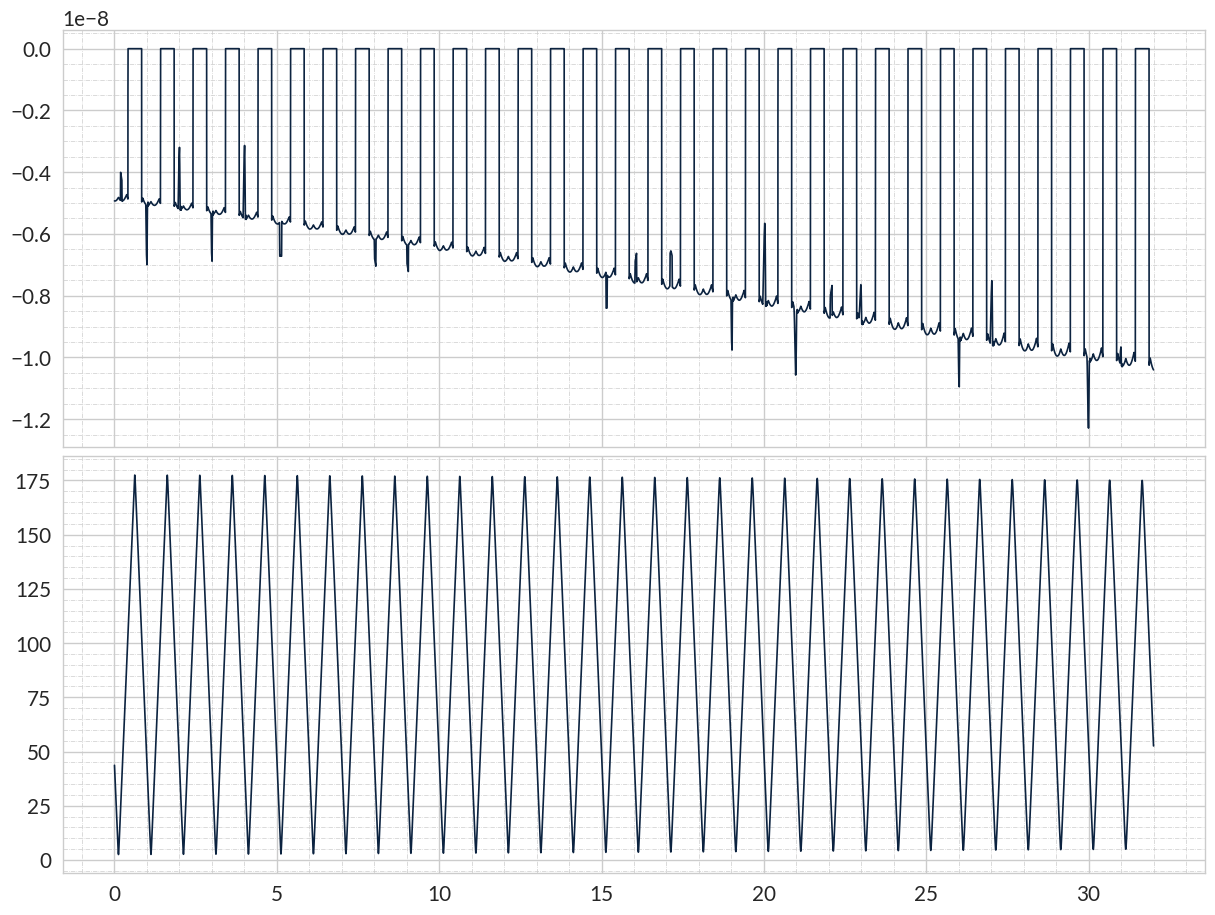

In [71]:
# 2011 SEP 28 00:00:00
metadata, runs = load_pickled_simulation_results("../results/single-2023-08-13T13-26-31-3265e")
fig, axs = plt.subplots(2, figsize=(12, 9), sharex=True)
axs[0].plot(get_revolutions_index(runs[1]), runs[1]["acc_rp_sun_cross"])
axs[1].plot(get_revolutions_index(runs[1]), runs[1]["angle_subsolar"])
# plt.xlim([2, 6])
format_plot()

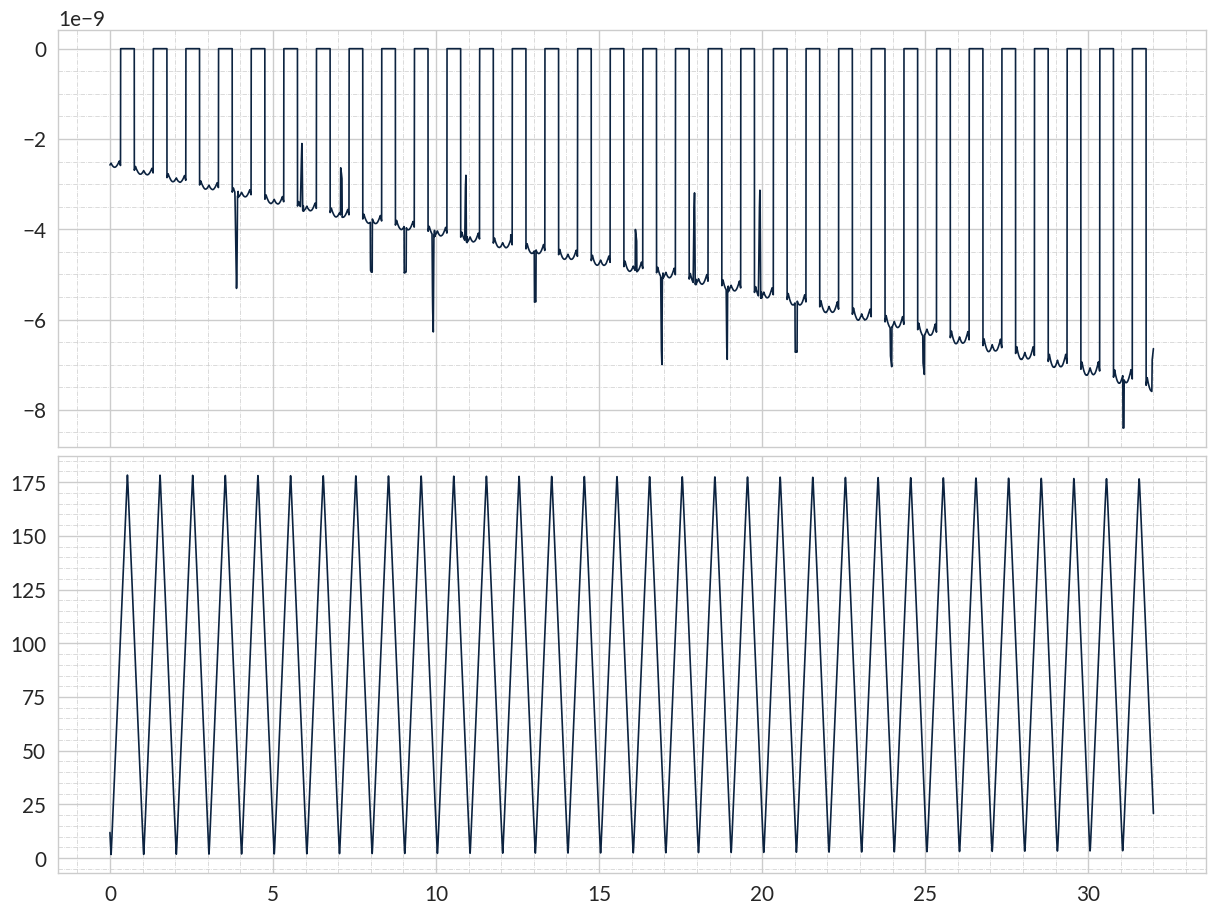

In [74]:
# 2011 SEP 26 18:00:00
metadata, runs = load_pickled_simulation_results("../results/single-2023-08-13T13-43-57-c6b47")
fig, axs = plt.subplots(2, figsize=(12, 9), sharex=True)
axs[0].plot(get_revolutions_index(runs[1]), runs[1]["acc_rp_sun_cross"])
axs[1].plot(get_revolutions_index(runs[1]), runs[1]["angle_subsolar"])
# plt.xlim([2, 6])
format_plot()